если что все фотографии и код есть на гит хабе

https://github.com/kopch02/semestr6/tree/master/ML/lab11

 1) загрузите модель из библиотеки Dlib для выделения лица на изображении по 68 ключевым точкам и сверточную нейронную сеть ResNet от Microsoft, специально дообученную для выделения дескрипторов из лиц людей.

In [49]:
import os # чтение файлов и структуры директорий
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [50]:
import dlib
from skimage import io # Библиотека для доступа к картинкам 
from scipy.spatial import distance # Библиотека для вычисления евклидова расстояния между векторами признаков 
import matplotlib.pyplot as plt 
from matplotlib.figure import figaspect # Библиотеки для отображения картинок в блокноте 

In [3]:
sp = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()

In [4]:
def shape_of_image(img):
  dets = detector(img, 1) 
  for k, d in enumerate(dets):
    #print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        #k, d.left(), d.top(), d.right(), d.bottom()))
    shape = sp(img, d)
  return shape

In [5]:
def face_descriptor(img):
  return facerec.compute_face_descriptor(img, shape_of_image(img))

In [6]:
def plot_img(img1, img2):
  height_max = max(img1.shape[1], img2.shape[1])
  width_max = max(img1.shape[0], img2.shape[0])
  fig, ax = plt.subplots(1, 2)
  w, h = figaspect(width_max/(2*height_max))
  fig.set_size_inches(w, h)
  plt.subplot(121),plt.imshow(img1)
  plt.title('Первое фото'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(img2)
  plt.title('Второе фото'), plt.xticks([]), plt.yticks([])
  plt.show()

In [7]:
def dist(face_descriptor1, face_descriptor2):
  a = distance.euclidean(face_descriptor1, face_descriptor2)
  s = 'Один и тот же человек' if a < 0.6 else 'Разные люди'
  print(f"Евклидово расстояние: {a} \n{s}")

2) Подготовьте ряд своих фотографий с указанием примерного возраста, а также фотографии своих родственников, знакомых и т.д. - для определения корректности работы нейронной сети. Требование к фото - одиночные!

3) Выберите одну из своих фотографий в качестве эталона. Остальные фото сравните с эталонной и укажите Евклидово расстояние между двумя дексрипторами лиц, а также результат сопоставления. Ошибается ли сеть? В каких случаях? 

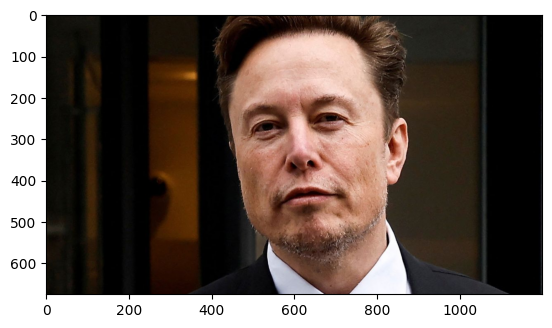

In [8]:
img1 = io.imread('img/ilon.jpg')
plt.imshow(img1)

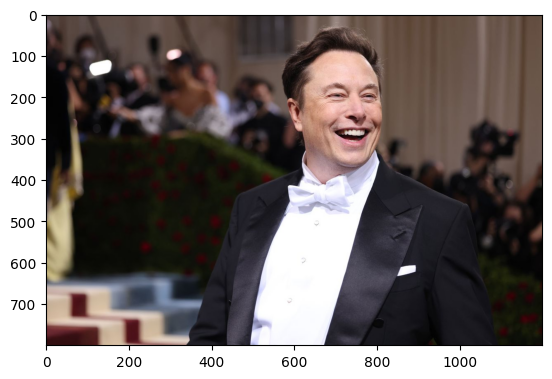

In [9]:
img2 = io.imread('img/ilon2.jpg')
plt.imshow(img2)

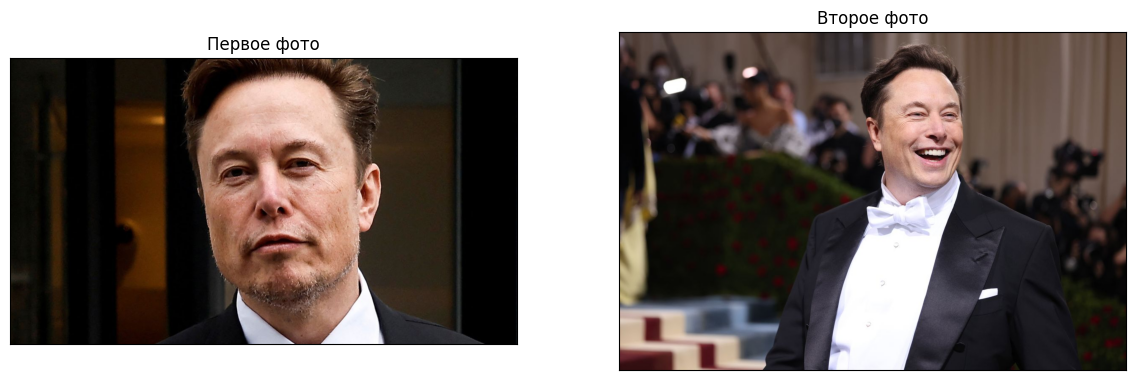

Евклидово расстояние: 0.4215389582697952 
Один и тот же человек


In [10]:
plot_img(img1, img2)
dist(face_descriptor(img1), face_descriptor(img2))

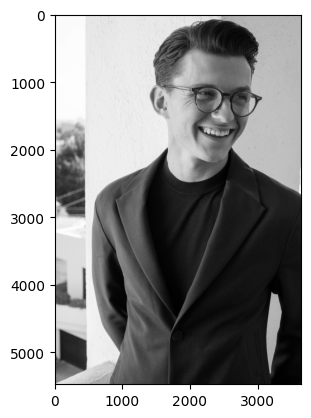

In [11]:
img2 = io.imread('img/holland.jpg')
plt.imshow(img2)

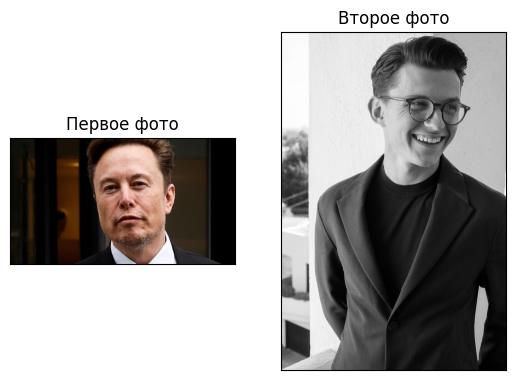

Евклидово расстояние: 0.7569986401806509 
Разные люди


In [12]:
plot_img(img1, img2)
dist(face_descriptor(img1), face_descriptor(img2))

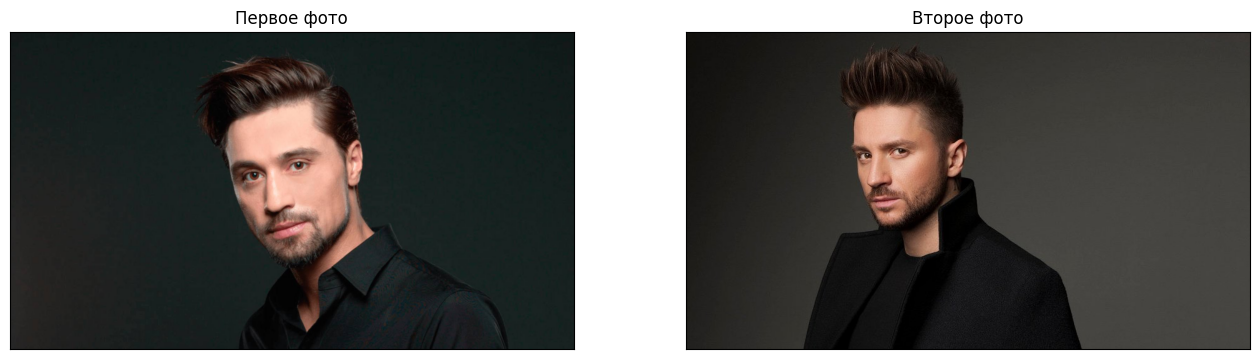

Евклидово расстояние: 0.6441886927291989 
Разные люди


In [13]:
img1 = io.imread('img/bilan.jpg')
img2 = io.imread('img/lazarev.jpg')
plot_img(img1, img2)
dist(face_descriptor(img1), face_descriptor(img2))

даже на очене похожих людях определило правильно, но было уже на грани, 0.64 не особо уверенный результат

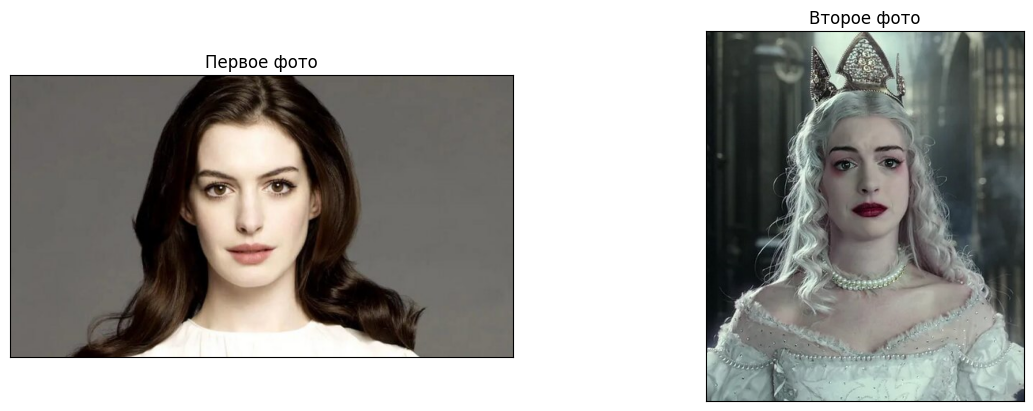

Евклидово расстояние: 0.5510052246983025 
Один и тот же человек


In [14]:
img1 = io.imread('img/hathaway.jpg')
img2 = io.imread('img/hathaway2.jpg')
plot_img(img1, img2)
dist(face_descriptor(img1), face_descriptor(img2))

загружаем все фотографии для поиска

In [15]:
def getfilelist(path):
    photos = []
    for root, dirs, files in os.walk(path):
        for name in files:
            fullname = os.path.join(root, name)
            if ('.jpg' in fullname.lower() or '.jpeg' in fullname.lower()):
                photos.append(fullname)
    return photos

получаем информацию о лиццах

In [16]:
def get_face_descriptors(filename):
    faces = []
    img = io.imread(filename)
    detected_faces = detector(img, 1)
    shape = None
    face_descriptor = None
    for k, d in enumerate(detected_faces):
        shape = sp(img, d)
        try:
            face_descriptor = facerec.compute_face_descriptor(img, shape)
            if (face_descriptor != None):
                faces.append(face_descriptor)
        except Exception as ex:
            pass
    return faces

4) Загрузите множество фотографий, в том числе групповых снимков. Определите две персоны, например, Вас и кого-то еще, выберите для каждой персоны эталонный снимок. Используя предложенный код, обобщив его на работу с двумя эталонными фотографиями, отберите среди множества фото те, на которых встречаются определенные Вами персоны. Удачи!

In [17]:
import numpy as np
import shutil
import os

path = 'img_grops/'
resultpath = 'img_result/'
resultpath2 = 'img_result2/'
pattern = 'etalon_img/etalon1.jpg'
pattern2 = 'etalon_img/etalon2.jpg'


In [18]:
f1_etalon = get_face_descriptors(pattern)[0]  #эталонные лица
f2_etalon = get_face_descriptors(pattern2)[0]  #эталонные лица
files = getfilelist(path)  #все фотографии
n_photos = len(files)
print(f'Готовится к анализу: {n_photos} фотографий')
print(f'{"-" * 15}\n')
count_photo = 0
for i, f in enumerate(files):
    print(f'Анализ {f} - {i} фото из {n_photos}')
    if os.path.exists(f):
        try:
            findfaces = get_face_descriptors(f)
            print(f'На фото лиц: {len(findfaces)}')
            for f2 in findfaces:
                if f2:
                    euc_distance = distance.euclidean(f1_etalon, f2)
                    print(f"{euc_distance = }")
                    euc_distance2 = distance.euclidean(f2_etalon, f2)
                    print(f"{euc_distance2 = }")
                    if euc_distance < 0.6:
                        print('Найдено лицо: ' + f)
                        shutil.copyfile(f, resultpath + f.split('/')[-1])
                    if euc_distance2 < 0.6:
                        print('Найдено лицо: ' + f)
                        shutil.copyfile(f, resultpath2 + f.split('/')[-1])
            print('----------------------------------------------\n')
        except:
            continue

Готовится к анализу: 7 фотографий
---------------

Анализ img_grops/1.jpg - 0 фото из 7
На фото лиц: 4
euc_distance = 0.976127620017337
euc_distance2 = 0.8944303732073441
euc_distance = 0.9130606993944528
euc_distance2 = 0.9872668612110603
euc_distance = 0.4037509687726685
euc_distance2 = 0.914452626954384
Найдено лицо: img_grops/1.jpg
euc_distance = 0.9436142335955625
euc_distance2 = 0.9208226133807728
----------------------------------------------

Анализ img_grops/2.jpg - 1 фото из 7
На фото лиц: 2
euc_distance = 0.16094415496275893
euc_distance2 = 0.8941424979871987
Найдено лицо: img_grops/2.jpg
euc_distance = 0.771152742968328
euc_distance2 = 0.9031693093168378
----------------------------------------------

Анализ img_grops/3.jpg - 2 фото из 7
На фото лиц: 4
euc_distance = 0.4282763948382887
euc_distance2 = 0.9222064147904212
Найдено лицо: img_grops/3.jpg
euc_distance = 0.843653079195777
euc_distance2 = 0.8092291700684497
euc_distance = 0.6504857176050393
euc_distance2 = 0.855626

первое фото эталон и что к нему налось

In [46]:
import os

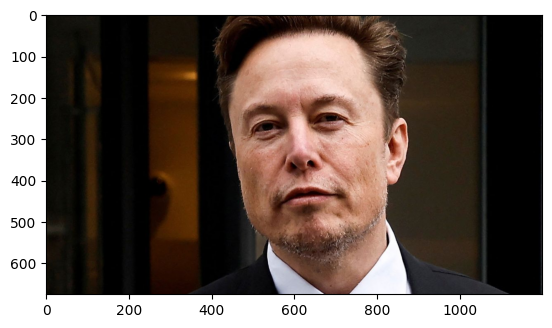

In [27]:
img = io.imread(pattern)
plt.imshow(img)

['etalon_img', 'img', 'img_grops', 'img_result', 'img_result2', 'lab11.ipynb', 'models']
['1.jpg', '2.jpg', '3.jpg', '7.jpg']


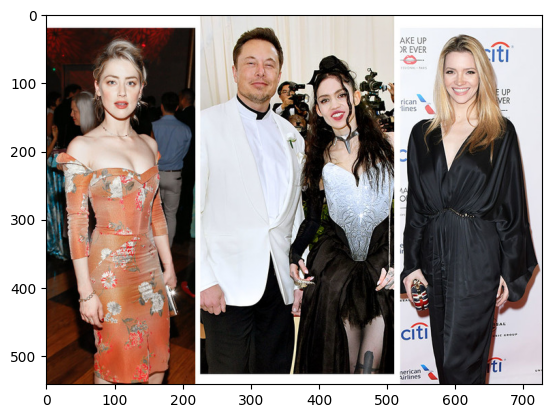

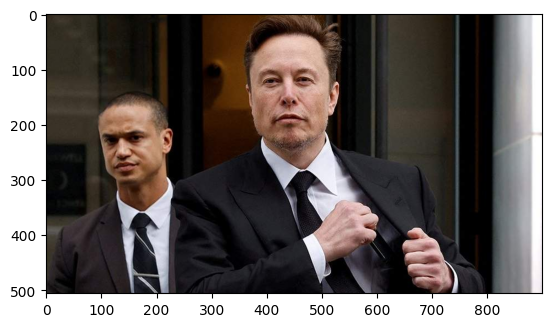

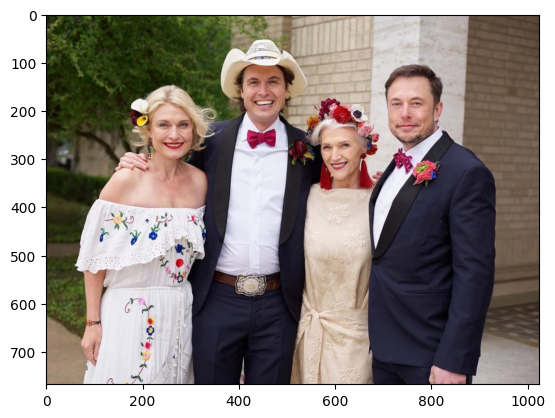

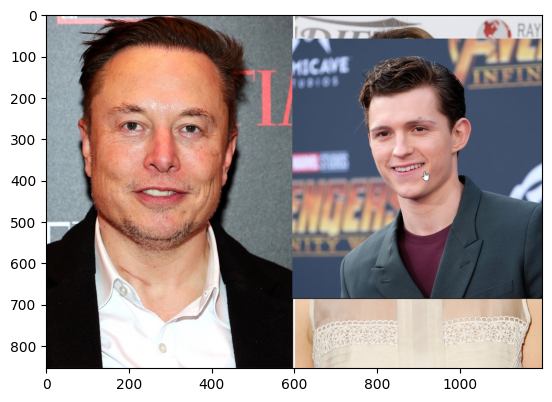

In [45]:
print(os.listdir())
os.chdir('img_result')
print(os.listdir())
for i in os.listdir():
    plt.imshow(io.imread(i))
    plt.show()
os.chdir('..')


второе

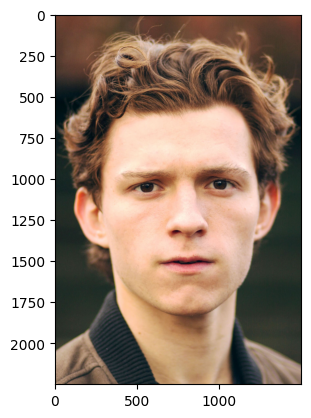

In [47]:
img = io.imread(pattern2)
plt.imshow(img)

['etalon_img', 'img', 'img_grops', 'img_result', 'img_result2', 'lab11.ipynb', 'models']
['4.jpg', '5.jpg', '6.jpg', '7.jpg']


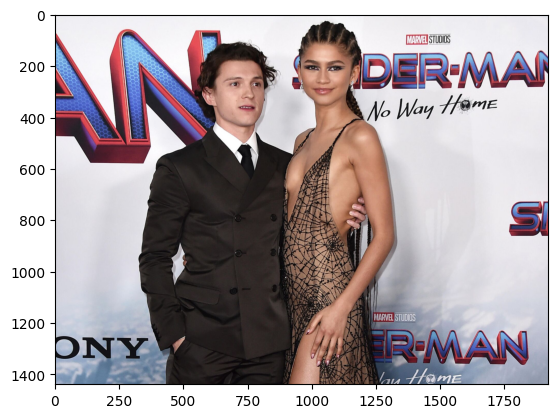

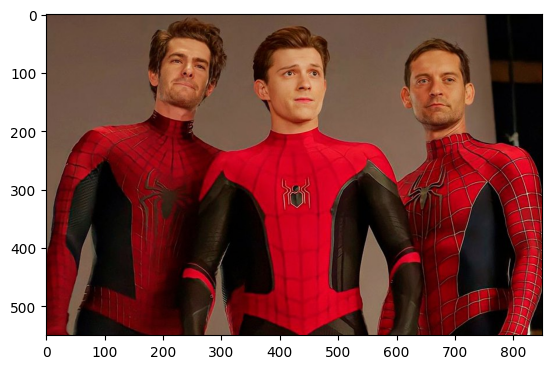

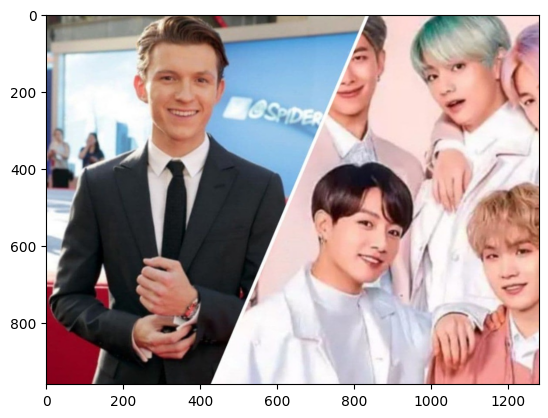

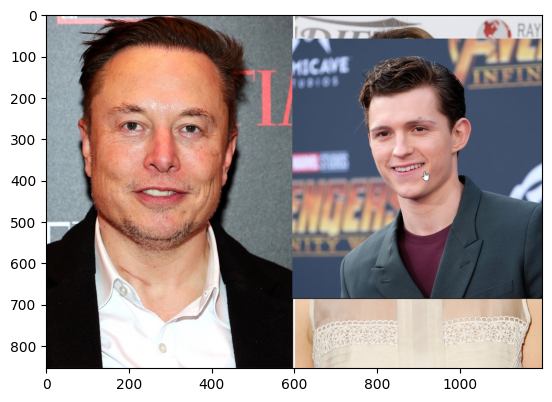

In [48]:
print(os.listdir())
os.chdir('img_result2')
print(os.listdir())
for i in os.listdir():
    plt.imshow(io.imread(i))
    plt.show()
os.chdir('..')


как видно распознование работает олично